In [ ]:
!unzip archive.zip


Archive:  archive.zip
replace Unemployment in India.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

df = pd.read_csv('Unemployment in India.csv')
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [13]:
print(df.columns)



Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [15]:
df.columns = df.columns.str.strip()


/tmp/ipython-input-2224962488.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


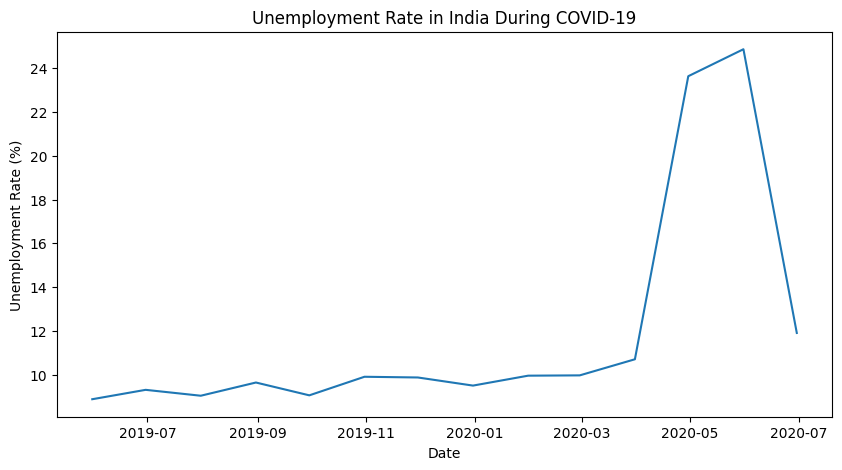

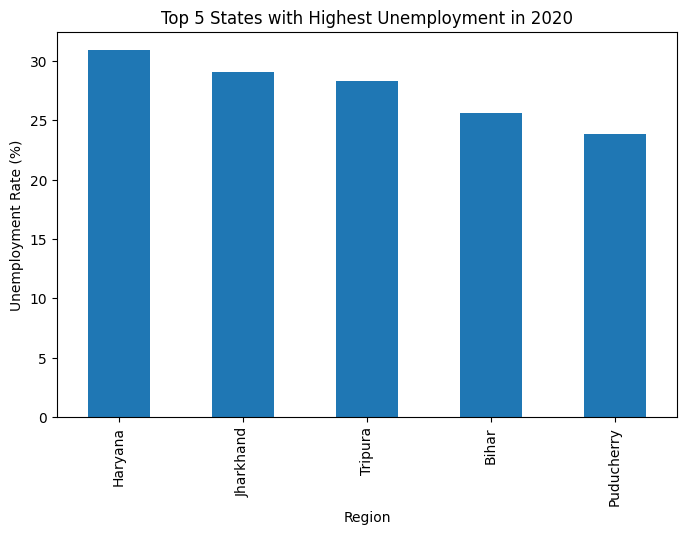

/tmp/ipython-input-2224962488.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Period'] = df['Date'].dt.year.apply(period)


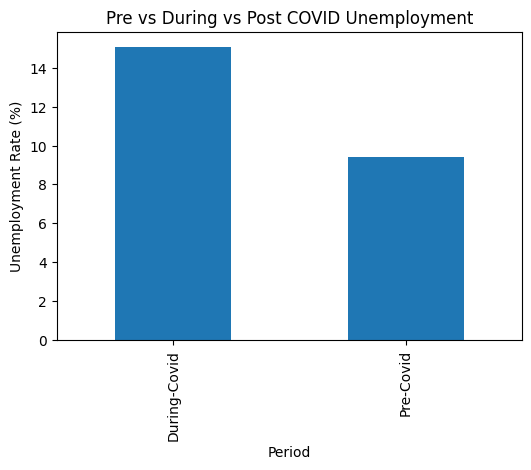

In [16]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna()

trend = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,5))
plt.plot(trend.index, trend.values)
plt.title('Unemployment Rate in India During COVID-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

df_2020 = df[df['Date'].dt.year == 2020]

top_states = (
    df_2020.groupby('Region')['Estimated Unemployment Rate (%)']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8,5))
top_states.plot(kind='bar')
plt.title('Top 5 States with Highest Unemployment in 2020')
plt.ylabel('Unemployment Rate (%)')
plt.show()

def period(year):
    if year < 2020:
        return 'Pre-Covid'
    elif year == 2020:
        return 'During-Covid'
    else:
        return 'Post-Covid'

df['Period'] = df['Date'].dt.year.apply(period)

period_avg = df.groupby('Period')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(6,4))
period_avg.plot(kind='bar')
plt.title('Pre vs During vs Post COVID Unemployment')
plt.ylabel('Unemployment Rate (%)')
plt.show()
